In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import csv
from sklearn import cross_validation

from keras.layers import Input, Flatten, Dense
from keras.models import Model 

%matplotlib inline

print('Hello')

Using TensorFlow backend.


Hello


Number of data rows: 8036
Number of data: 18
Number of classes: 3
Images shape: (18, 66, 200, 3)
Steering shape: (18,)
This image is: <class 'numpy.ndarray'> with dimensions: (66, 200, 3)


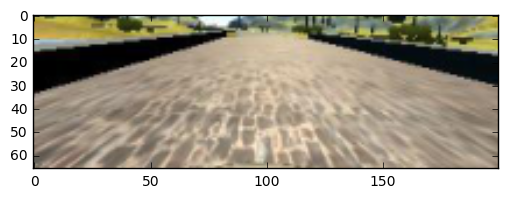

In [3]:
# read data:
# steering angles form csv file
# image files paths from cvs file
# images from jpg files

csv_file = './udacity_data/driving_log.csv'
image_files = './udacity_data/'

steering = []
image_paths = []
images = []

with open(csv_file, newline='') as f:
    driving_data = list(csv.reader(f, delimiter=',', quoting=csv.QUOTE_NONE))

print('Number of data rows:', len(driving_data[1:]))

# Change image size 
# from original 160x320x3
# to NVidia input 66x200x3

def image_transformation(image):
    crop_image = image[54:140,:,:]
    resize_image = cv2.resize(crop_image, (200,66), interpolation = cv2.INTER_AREA)
    return resize_image

#for row in range(1, len(driving_data)):
for row in range(1, 4):
    correction = 0.15
    steering_center = float(driving_data[row][3])
    steering_left = steering_center + correction
    steering_right = steering_center - correction
    # center
    steering.append(steering_center)
    image_paths.append(image_files + driving_data[row][0].strip())
    # left
    steering.append(steering_left)
    image_paths.append(image_files + driving_data[row][1].strip())
    # right
    steering.append(steering_right)
    image_paths.append(image_files + driving_data[row][2].strip())

for i in range (len(image_paths)):
    image = mpimg.imread(image_paths[i])
    images.append(image)

# Flipping Images And Steering Measurements
# multuply number of data by 2
for i in range(len(images)):
    image = images[i]
    image_flipped = np.fliplr(image)
    steering_flipped = -steering[i]
    
    images.append(image_flipped)
    steering.append(steering_flipped)
    
for i in range(len(images)):
    images[i] = image_transformation(images[i])

steering = np.asarray(steering)
images = np.asarray(images)
    
n_classes = len(np.unique(steering))

print('Number of data:', len(steering))
print('Number of classes:', n_classes)

print('Images shape:', images.shape)
print('Steering shape:', steering.shape)

# print example
image = images[0].squeeze()
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

Croped image is: <class 'numpy.ndarray'> with dimensions: (66, 200, 3)


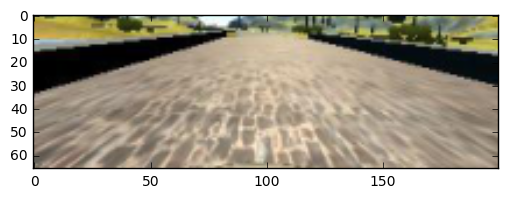

In [9]:
# print example
new_image = image_transformation(image)
print('Croped image is:', type(new_image), 'with dimensions:', new_image.shape)
plt.imshow(new_image)

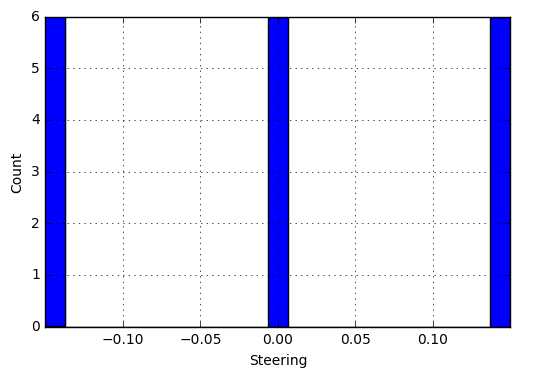

In [12]:
n, bins, patches = plt.hist(steering, bins=23)

plt.xlabel('Steering')
plt.ylabel('Count')
plt.axis([np.min(steering), np.max(steering), 0, np.max(n)])
#plt.axis([-1, 1, 0, np.max(n)])
plt.grid(True)
plt.show()

In [10]:
X_train, X_validation, y_train, y_validation = cross_validation.train_test_split(images, steering, test_size=0.3)

print('X_train, y_train', X_train.shape, y_train.shape)
print('X_validation, y_validation', X_validation.shape, y_validation.shape)

#image_paths = np.asarray(image_paths)

X_train, y_train (12, 160, 320, 3) (12,)
X_validation, y_validation (6, 160, 320, 3) (6,)


In [ ]:
# Normalize data
X_train_normalized = (X_train_dimensions - 127.5)/127.5 
X_test_normalized = (X_test_dimensions - 127.5)/127.5
print('Shape', X_train_normalized.shape, X_test_normalized.shape)
print('First element', X_train_dimensions[0][0][0], X_test_dimensions[0][0][0])
print('First element', X_train_normalized[0][0][0], X_test_normalized[0][0][0])